In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from logitplots import plt_confusion_matrix, plt_decision_boundaries, plt_correlation_matrix

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df= pd.read_csv("chipVariantCalling_run1.tsv", sep='\t')
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(df[df.chipOrControl == 'Unknown'].index)

In [12]:
df.head()

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,7281,26,0.0036,0.0033,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.0,1.182210,CHIP
4,4010289633,7282,29,0.0040,0.0036,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.7,1.061729,CHIP
8,4010289633,7282,24,0.0033,0.0033,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.9,1.005270,CHIP
12,4010289633,178,2,0.0112,0.0120,MODERATE,NRAS,chr1:115256571_T/C,Baseline,Male,MS2083,2:2,88:88,1:1,37.0,1.000000,CHIP
13,4010289633,1773,6,0.0034,0.0035,MODERATE,NRAS,chr1:115258674_T/C,Baseline,Male,MS2083,2:2,889:874,3:3,37.0,1.017150,CHIP


In [13]:
df.columns

Index(['d.barcode', 'DP', 'VD', 'AF', 'HIAF', 'IMPACT', 'SYMBOL', 'loci',
       'sampleTimePt', 'gender', 'MSID', 'BIAS', 'REFBIAS', 'VARBIAS', 'QUAL',
       'ODDRATIO', 'chipOrControl'],
      dtype='object')

In [14]:
df.shape

(121936, 17)

In [15]:
df2 = df.drop("d.barcode", axis = 1)
df2.describe()

,DP,VD,AF,HIAF,QUAL,ODDRATIO
count,121936.000000,121936.000000,121936.000000,121936.000000,121936.000000,121936.000000
mean,5295.314009,128.461800,0.010620,0.010656,35.418086,1.618435
std,12678.412153,2821.706231,0.065492,0.065854,2.573278,43.551910
min,2.000000,2.000000,0.002500,0.001500,22.500000,0.000000
25%,521.000000,2.000000,0.002800,0.002800,34.700000,1.012780
50%,1031.000000,4.000000,0.003500,0.003500,37.000000,1.022390
75%,4213.250000,14.000000,0.005200,0.005300,37.000000,1.038983
max,455487.000000,319533.000000,1.000000,1.000000,37.000000,14285.714286


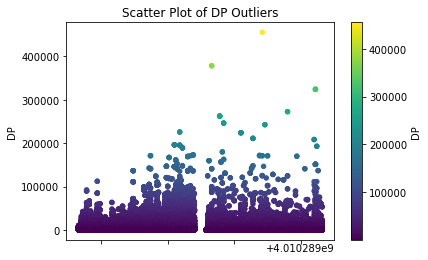

In [16]:
DPscatter = df.plot.scatter(x='d.barcode',
                      y='DP',
                      c='DP',
                      colormap='viridis',
                           title = "Scatter Plot of DP Outliers")

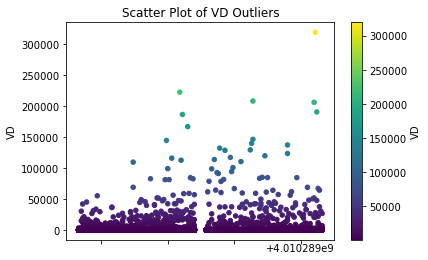

In [17]:
VDscatter = df.plot.scatter(x='d.barcode',
                      y='VD',
                      c='VD',
                      colormap='viridis',
                           title = "Scatter Plot of VD Outliers")

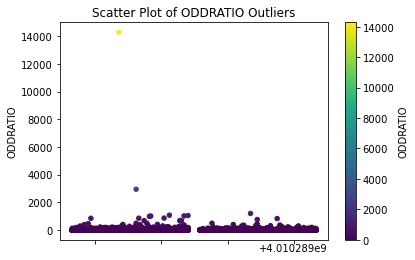

In [18]:
Oddscatter = df.plot.scatter(x='d.barcode',
                      y='ODDRATIO',
                      c='ODDRATIO',
                      colormap='viridis',
                           title = "Scatter Plot of ODDRATIO Outliers")

## CORRELATION HEATMAP


Text(0.5, 1.0, 'Run1 Correlation Heat Map')

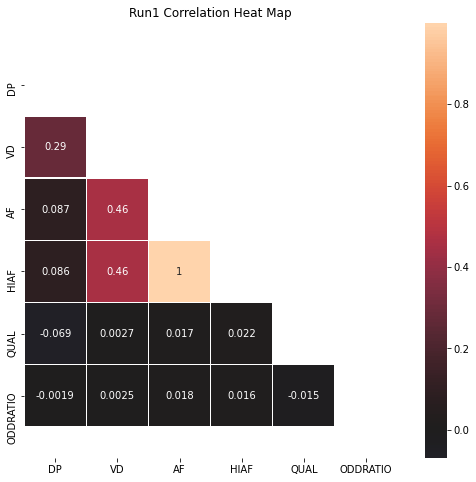

In [19]:
corrs = df.drop('d.barcode', axis = 1).corr()
plt_correlation_matrix(corrs)
plt.title("Run1 Correlation Heat Map")

# CONTINUOUS VARIABLE PAIR PLOT

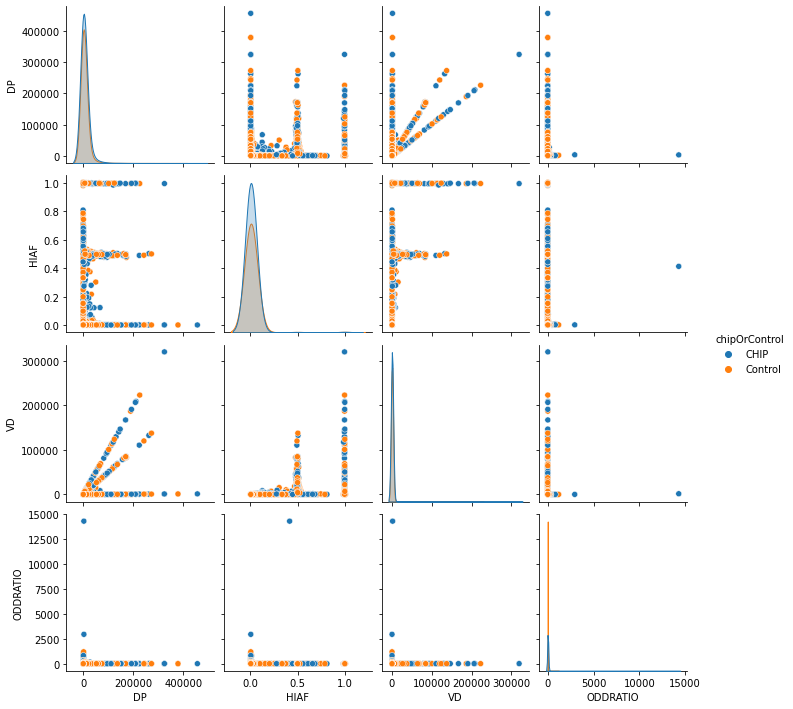

In [32]:
sns.pairplot(df, vars = ['DP', "HIAF","VD", "ODDRATIO"], hue="chipOrControl", diag_kws={'bw':1.0})

# CATEGORICAL PATTERNS

In [34]:
df.head()

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,7281,26,0.0036,0.0033,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.0,1.182210,0
4,4010289633,7282,29,0.0040,0.0036,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.7,1.061729,0
8,4010289633,7282,24,0.0033,0.0033,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.9,1.005270,0
12,4010289633,178,2,0.0112,0.0120,MODERATE,NRAS,chr1:115256571_T/C,Baseline,Male,MS2083,2:2,88:88,1:1,37.0,1.000000,0
13,4010289633,1773,6,0.0034,0.0035,MODERATE,NRAS,chr1:115258674_T/C,Baseline,Male,MS2083,2:2,889:874,3:3,37.0,1.017150,0


### $Count$ $Plot$

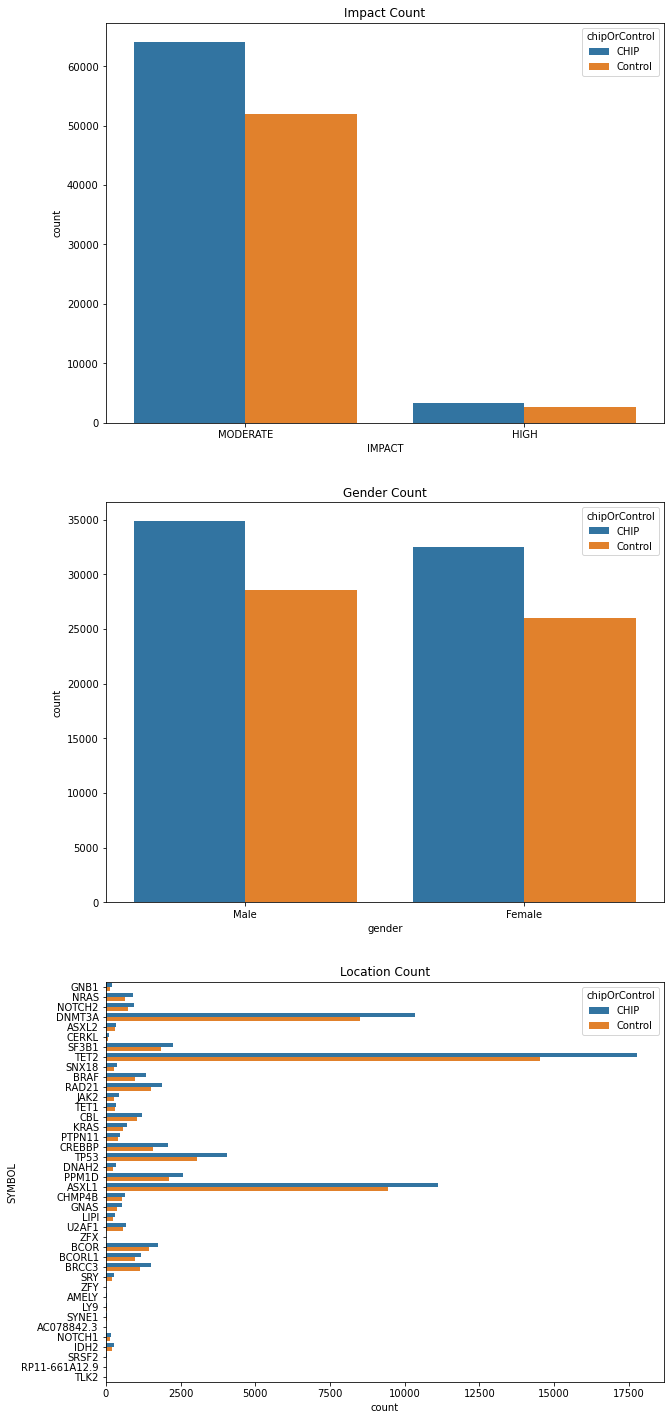

In [39]:
fig, axes = plt.subplots(3, figsize=(10, 25))
sns.countplot(x='IMPACT', hue = 'chipOrControl',data = df, ax=axes[0]).set_title('Impact Count')
sns.countplot(x='gender', hue = 'chipOrControl',data = df, ax=axes[1]).set_title('Gender Count')
sns.countplot(y='SYMBOL', hue = 'chipOrControl',data = df, ax=axes[2]).set_title('Location Count');

### $Males$ $vs$ $Females$

In [36]:
df.groupby('gender').count()

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
gender,,,,,,,,,,,,,,,,
Female,58531,58531,58531,58531,58531,58531,58531,58531,58531,58531,58531,58531,58531,58531,58531,58531
Male,63405,63405,63405,63405,63405,63405,63405,63405,63405,63405,63405,63405,63405,63405,63405,63405


In [37]:
df.value_counts(["gender", "chipOrControl"])

gender  chipOrControl
Male    0                34845
Female  0                32503
Male    1                28560
Female  1                26028
dtype: int64